# Analysis of handwritten digits

In [61]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
# Loading data set
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

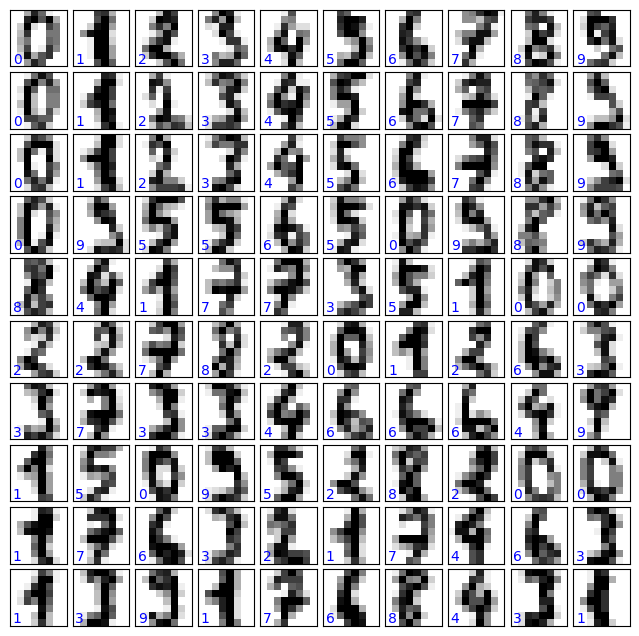

In [63]:
# Drawing ceils
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

# Filling
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='blue')


We will treat each pixel as a feature. "Flattening" each pixel array, we obtain that each digit is represented by a one-dimensional array with 64 elements.

In [64]:
X = digits.data
X.shape

(1797, 64)

In [65]:
y = digits.target
y.shape

(1797,)

In [66]:
from sklearn.manifold import Isomap
# Using isomap for dimensionality reduction
iso = Isomap(n_components=2, n_neighbors=10)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

(1797, 2)


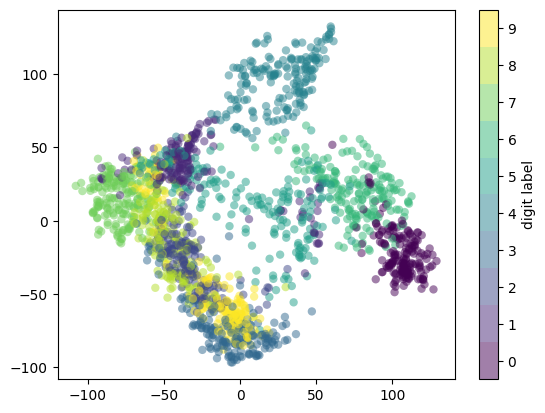

In [78]:
# Visualization
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.get_cmap('viridis', 10))

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)


## Naive Bayes classifier

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# Using a naive Bayes classifier
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=0)
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [80]:
# Checking the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(113.9222222222222, 0.5, 'real value')

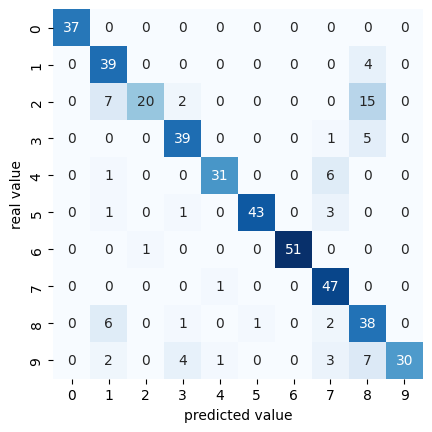

In [70]:
from sklearn.metrics import confusion_matrix

# Drawing a matrix with classification errors
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('real value')

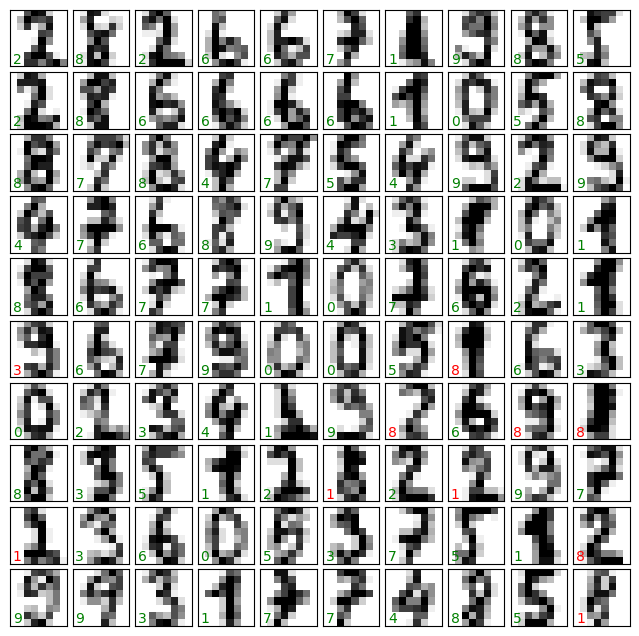

In [81]:
# Drawing the number table
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

## Support Vector Machine

In [84]:
from sklearn.svm import SVC
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = SVC()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [88]:
# Improved accuracy comparing with Naive Bayes
accuracy_score(ytest, y_model)

0.9911111111111112

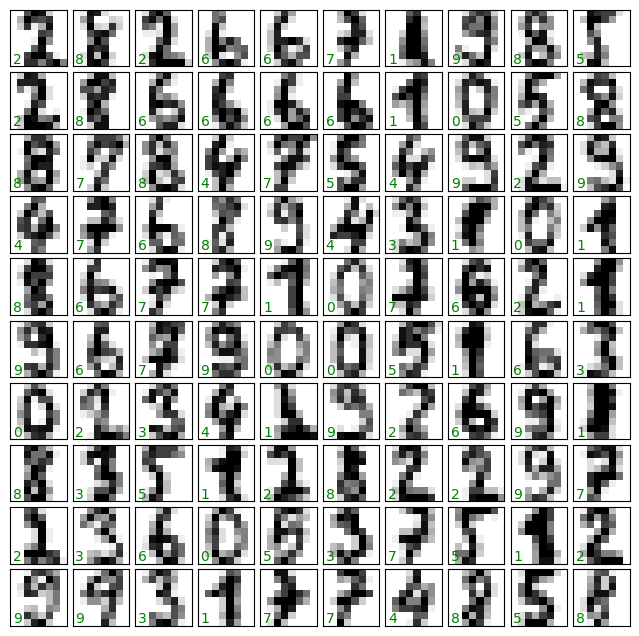

In [86]:
# Drawing the number table
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

## Random forest classifier

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Using a Random Forest classifier
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
model = RandomForestClassifier()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [90]:
# Improved accuracy comparing with Naive Bayes
accuracy_score(ytest, y_model)

0.9755555555555555

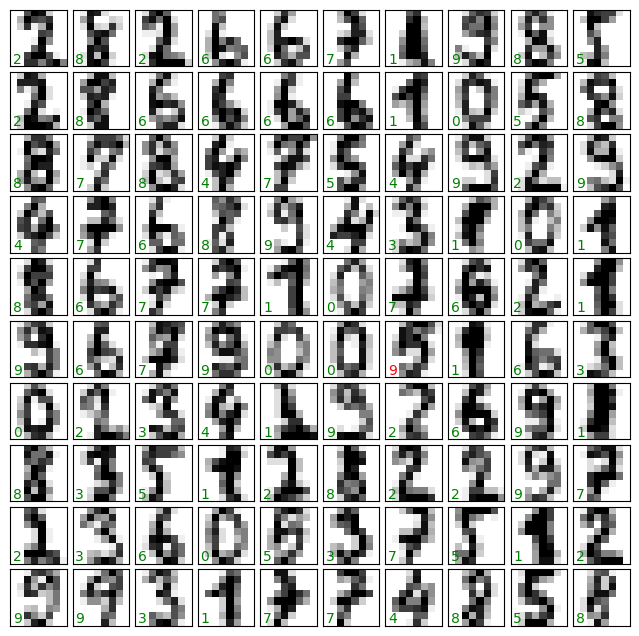

In [91]:
# Drawing the number table
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')